Importing Libraries

In [2]:
import tensorflow as tf #library for training machine learning models and deep learning
import matplotlib.pyplot as plt #plotting library in python (for graphs)

## Data Pre-Processing

Training Image Pre-Processing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\7th sem project\Machine learning part\dataset\train",
    labels = "inferred", # it is like tags for each value(a,b,c 12,23) based on folder names
    label_mode = "categorical", #vector representation
    class_names = None, 
    color_mode = "grayscale", # means the images are in black and white
    batch_size = 32, #process 32 image at one time 
    image_size = (24, 24), # image pixel size is 24*24
    shuffle = True, #mixes image everytime when it trains
    seed = 42, # helps in randomization
    validation_split = 0.2, #20% image lai testing ma rakheko
    subset = "training", # yo purai lai "keyword" le denote gareko
    interpolation = "bilinear", # resizing 
    crop_to_aspect_ratio = False, #whether to crop the image or not 
)

Found 13640 files belonging to 62 classes.
Using 10912 files for training.


Validation Image Pre-Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r'D:\7th sem project\Machine learning part\dataset\validate',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(24, 24),
    shuffle=True,
    seed=42, 
    validation_split=0.2,  
    subset="validation", 
    interpolation="bilinear",
    crop_to_aspect_ratio=False
)

Found 2728 files belonging to 62 classes.
Using 545 files for validation.


# Model Building

In [5]:
learn = tf.keras.models.Sequential() # blueprint layer while building model

Building convulation layer

In [6]:
# 1st convolutional layer
learn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(24, 24, 1)))
# Uses 32 different filters to look for patterns in the image
# Each filter is a small 3x3 pixel square
# Padding='same' keeps the output image size the same as the input size
# ReLU activation helps the model learn complex patterns by introducing non-linearity

# 2nd convolutional layer
learn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
# Again uses 32 filters to find additional patterns in the image
# Each filter is a 3x3 pixel square
# This layer will process the output of the previous convolutional layer

# Max pooling layer
learn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# Reduces the size of the image by summarizing 2x2 blocks into a single value
# The filter moves by 2 pixels each time, making the image smaller and more manageable
# This helps to keep only the most important information and reduces computation



c:\Users\bitte\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Dropout to prevent overfitting
learn.add(tf.keras.layers.Dropout(0.25))

In [8]:
# Flattening layer
learn.add(tf.keras.layers.Flatten()) 

In [9]:
#Fully connected layers
learn.add(tf.keras.layers.Dense(units = 512, activation='relu'))
learn.add(tf.keras.layers.Dense(units = 256, activation='relu'))

#Dropout layers
learn.add(tf.keras.layers.Dropout(0.5))

#Output layer
learn.add(tf.keras.layers.Dense(units =62, activation='softmax')) # multiclas classification ko lagi 


In [10]:
# Compiling the model

learn.compile(optimizer='adam', loss='categorical_crossentropy', metrics =['accuracy'])

# Model Summary


In [11]:
learn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3872)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,982,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,139,806 (8.16 MB)

 Trainable params: 2,139,806 (8.16 MB)

 Non-trainable params: 0 (0.00 B)

## Evaluating the model

In [21]:
# Train the model
training_history = learn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10

)


Epoch 1/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.8740 - loss: 0.4217 - val_accuracy: 0.6440 - val_loss: 1.6185
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.8726 - loss: 0.4192 - val_accuracy: 0.6275 - val_loss: 1.4819
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.8721 - loss: 0.4194 - val_accuracy: 0.6312 - val_loss: 1.6927
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.8564 - loss: 0.4712 - val_accuracy: 0.6165 - val_loss: 1.7905
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.8552 - loss: 0.4667 - val_accuracy: 0.6257 - val_loss: 1.6966
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.8775 - loss: 0.4216 - val_accuracy: 0.5945 - val_loss: 1.7613
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.8796 - loss: 0.4023 - val_accuracy: 0.6294 - val_loss: 1.5573
Epoch 8/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.8713 - loss: 0.4243 - 

In [12]:
# Continue training the model for 10 more epochs
additional_history = learn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=50  # Additional epochs
)


Epoch 1/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 37s 104ms/step - accuracy: 0.0168 - loss: 13.1821 - val_accuracy: 0.0349 - val_loss: 4.0337
Epoch 2/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.0477 - loss: 4.0182 - val_accuracy: 0.0679 - val_loss: 3.8015
Epoch 3/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.0715 - loss: 3.8130 - val_accuracy: 0.1229 - val_loss: 3.4762
Epoch 4/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 70ms/step - accuracy: 0.1035 - loss: 3.5473 - val_accuracy: 0.2220 - val_loss: 3.0815
Epoch 5/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 24s 71ms/step - accuracy: 0.1620 - loss: 3.2290 - val_accuracy: 0.2606 - val_loss: 2.7756
Epoch 6/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 29s 86ms/step - accuracy: 0.2144 - loss: 2.9361 - val_accuracy: 0.2771 - val_loss: 2.6245
Epoch 7/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 27s 80ms/step - accuracy: 0.2646 - loss: 2.7388 - val_accuracy: 0.3174 - val_loss: 2.3840
Epoch 8/50
341/341 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.3161 - loss: 2.4724 

In [13]:
# training set accuracy

training_loss, training_accuracy = learn.evaluate(training_set)
print("Training Accuracy is :", training_accuracy)
print("Training loss is:", training_loss)

341/341 ━━━━━━━━━━━━━━━━━━━━ 25s 74ms/step - accuracy: 0.9778 - loss: 0.0743
Training Accuracy is : 0.9800220131874084
Training loss is: 0.0669841393828392


## Training Visualization


In [23]:
# Combining the histories
for key in training_history.history.keys():
    training_history.history[key].extend(additional_history.history[key])

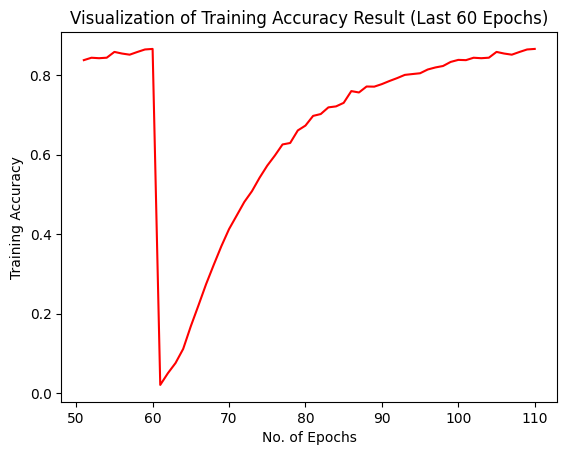

In [29]:
epochs = [i for i in range(51, 111)]  # Last 60 epochs (from 51 to 110)
plt.plot(epochs, training_history.history['accuracy'][-60:], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of Training Accuracy Result (Last 60 Epochs)')
plt.show()



## Validation Accuracy


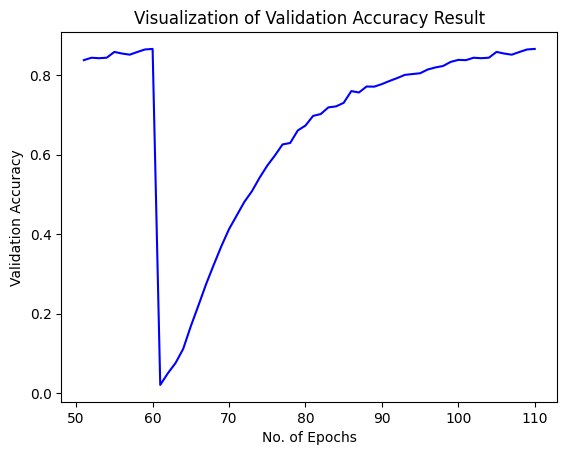

In [34]:
epochs = [i for i in range(51, 111)]
plt.plot(epochs, training_history.history['accuracy'][50:], color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()


## Test set Evaluation

In [35]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    r"D:\7th sem project\Machine learning part\dataset\test",
    labels = "inferred", # it is like tags for each value(a,b,c 12,23) based on folder names
    label_mode = "categorical", #vector representation
    class_names = None, 
    color_mode = "grayscale", # means the images are in black and white
    batch_size = 32, #process 32 image at one time 
    image_size = (24, 24), # image pixel size is 24*24
    shuffle = True, #mixes image everytime when it trains
    seed = 42, # helps in randomization
    interpolation = "bilinear", # resizing 
    crop_to_aspect_ratio = False, #whether to crop the image or not 
)

Found 682 files belonging to 62 classes.


In [44]:
# Testing accuracy and loss of the test data

testing_loss, testing_accuracy = learn.evaluate(testing_set)
print('Test Accuracy: ', testing_accuracy)
print('Test Loss:', testing_loss)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6053 - loss: 1.9252
Test Accuracy:  0.5923753380775452
Test Loss: 2.0188372135162354


## Saving the model

In [37]:
learn.save("1st Iteration.keras")

In [38]:
# for training history
training_history.history

{'accuracy': [0.8713343143463135,
  0.8680351972579956,
  0.8737170100212097,
  0.865469217300415,
  0.8636363744735718,
  0.8787573575973511,
  0.8792155385017395,
  0.874450147151947,
  0.8875550031661987,
  0.8855388760566711,
  0.020527860149741173,
  0.050036657601594925,
  0.07560484111309052,
  0.11116202175617218,
  0.16825513541698456,
  0.22067448496818542,
  0.27419355511665344,
  0.32276391983032227,
  0.3697763979434967,
  0.41257330775260925,
  0.4466642141342163,
  0.4809384047985077,
  0.5080645084381104,
  0.5419721603393555,
  0.5723057389259338,
  0.5977822542190552,
  0.6256415247917175,
  0.629307210445404,
  0.6609237790107727,
  0.673112154006958,
  0.6974890232086182,
  0.7021627426147461,
  0.7189332842826843,
  0.7214076519012451,
  0.7302969098091125,
  0.7598973512649536,
  0.7564149498939514,
  0.7714442610740662,
  0.7710776925086975,
  0.7774926424026489,
  0.7853739261627197,
  0.7926136255264282,
  0.8006781339645386,
  0.8027859330177307,
  0.804802060